In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/qualtrics_03_06.csv')

In [3]:
by_rep = pd.Series("No-repair(Conditon 1 and 2)" if ((i==1) or (i==2)) else "Repair(Condition 3 and 4)" for i in data['Participant study:'])
data['repair'] = by_rep

In [4]:
sanity_dict = {1:3,2:1,3:3,4:1}
sanity_dict_2 = {1:5,2:5,3:4,4:4}
data_sanity_check = data[[sanity_dict[data['Participant study:'][i]] == data['Did this voice agent ever make a mistake?'][i] for i in range(0,(len(data)))]]
data_sanity_check_2 = data_sanity_check[[sanity_dict_2[data_sanity_check['Participant study:'][i]] 
                                         == data_sanity_check['Did this agent ever try to repair a mistake it made?'][i] for i in data_sanity_check.index]]


In [5]:
data = data_sanity_check_2

In [6]:
print('condition one: ' + str(len(data[data[data.columns[1]]==1])) + ' participants')
print('condition two: ' + str(len(data[data[data.columns[1]]==2])) + ' participants')
print('condition three: ' + str(len(data[data[data.columns[1]]==3])) + ' participants')
print('condition four: ' + str(len(data[data[data.columns[1]]==4])) + ' participants')

condition one: 17 participants
condition two: 12 participants
condition three: 10 participants
condition four: 16 participants


In [17]:
def line_graph(formulas, x_range,title):
    for formula in formulas:
        x = np.array(x_range)  
        y = eval(formula)
        plt.title(title)
        plt.plot(x, y)  
    plt.xlabel("Percentage of Condition 1 or 3")
    plt.ylabel("Qualtrics Score")
    plt.legend(['No repair','Repair'])
    plt.show()

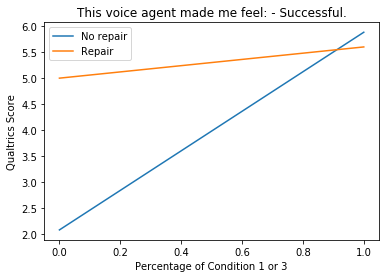

In [18]:
c1_average = np.average(data[data["Participant study:"]==1]["This voice agent made me feel: - Successful."])
c2_average = np.average(data[data['Participant study:']==2]['This voice agent made me feel: - Successful.'])
c3_average = np.average(data[data["Participant study:"]==3]["This voice agent made me feel: - Successful."])
c4_average = np.average(data[data['Participant study:']==4]['This voice agent made me feel: - Successful.'])
line_graph(['(c1_average*x)+c2_average*(1-x)','(c3_average*x)+c4_average*(1-x)'],[0,1],"This voice agent made me feel: - Successful.")

In [26]:
data_sanity_check_2.columns[30]

'repair'

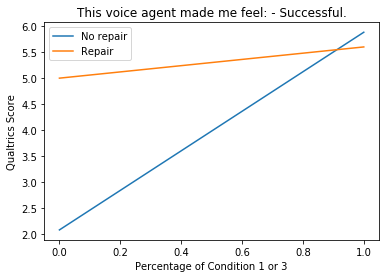

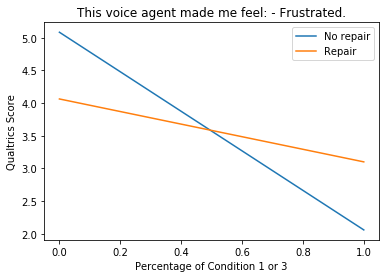

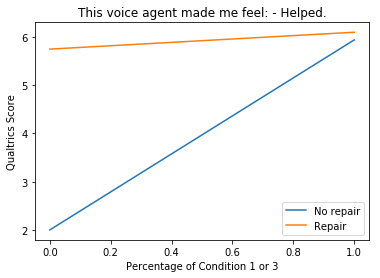

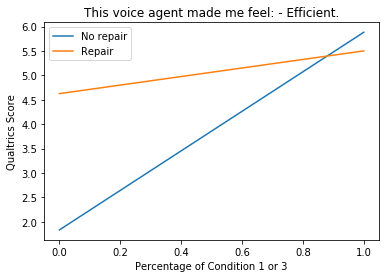

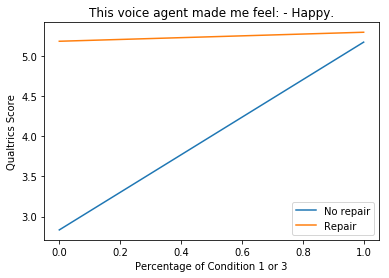

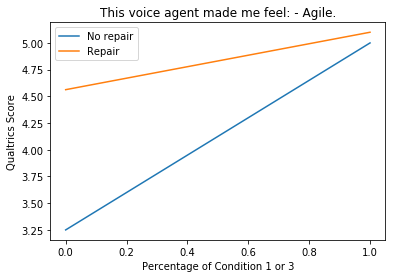

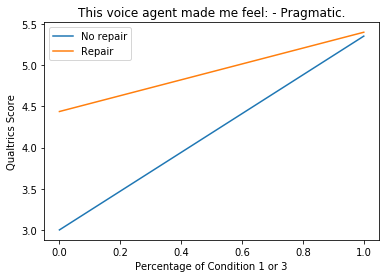

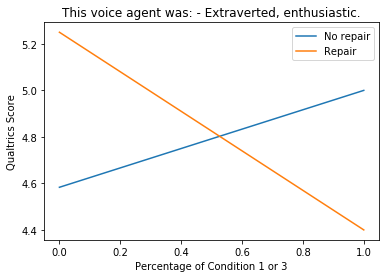

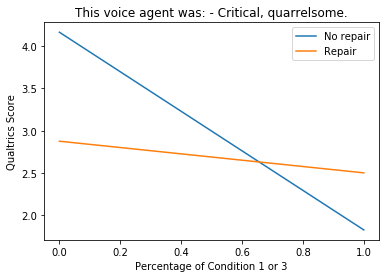

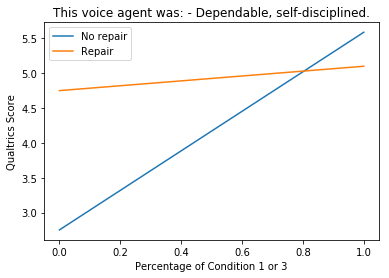

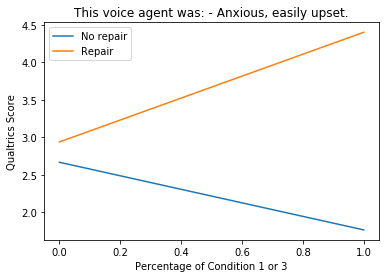

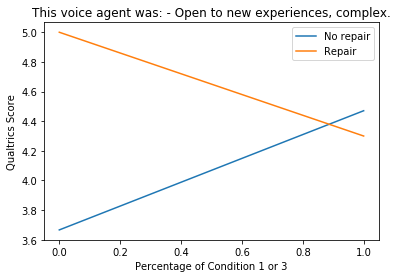

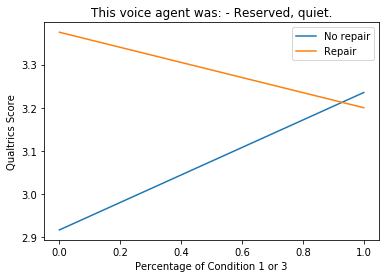

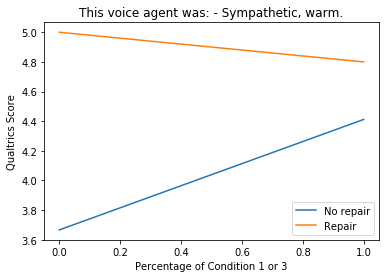

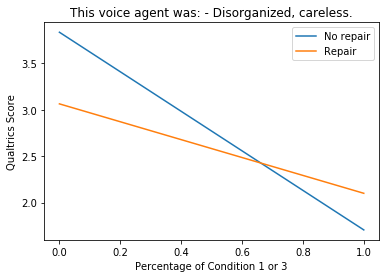

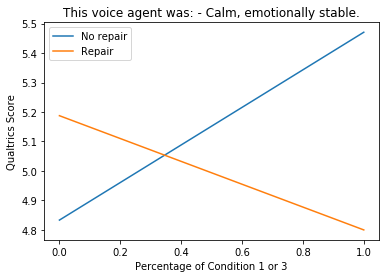

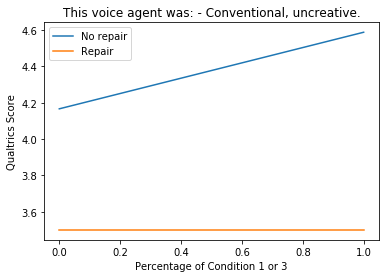

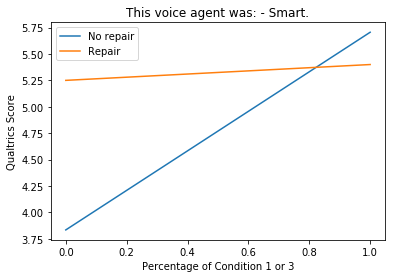

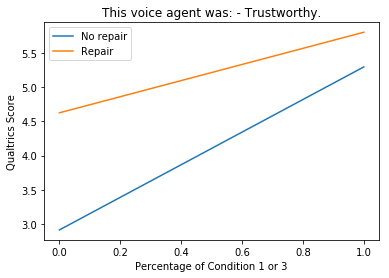

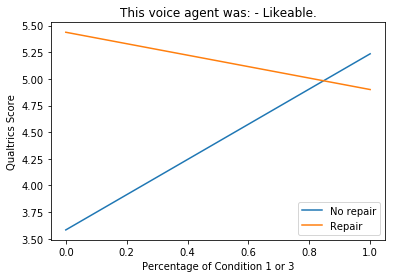

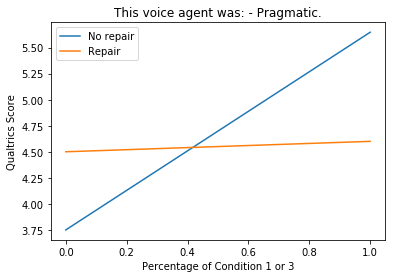

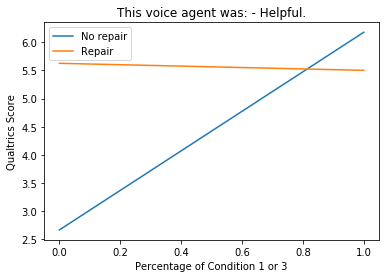

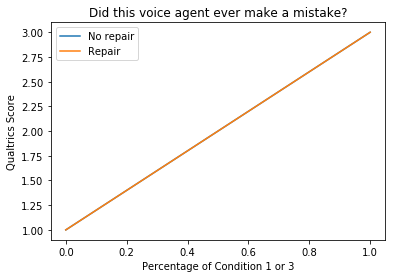

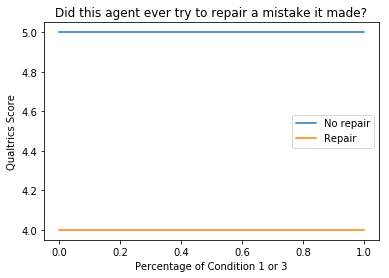

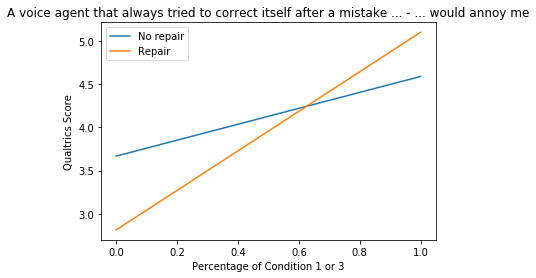

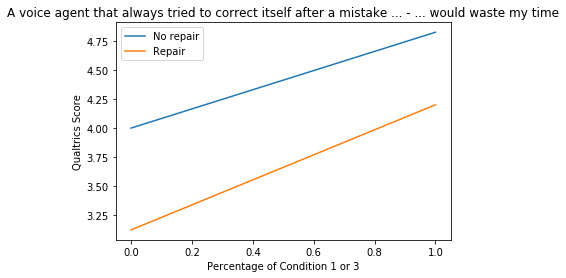

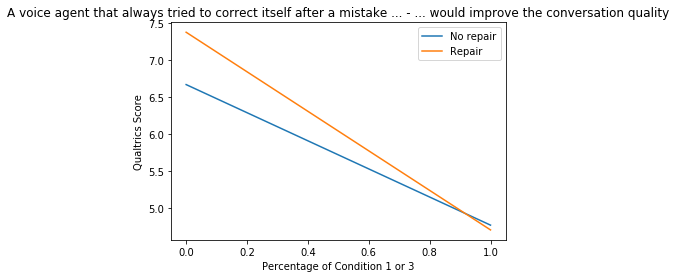

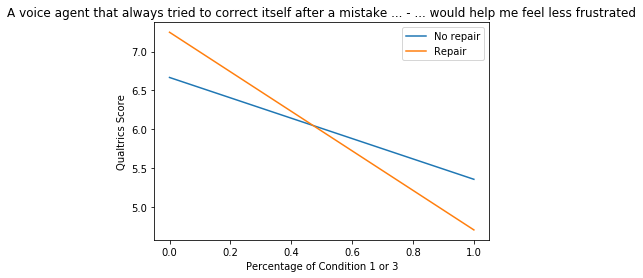

In [27]:
for col in data_sanity_check_2.columns[2:30]:
    c1_average = np.average(data[data["Participant study:"]==1][col])
    c2_average = np.average(data[data['Participant study:']==2][col])
    c3_average = np.average(data[data["Participant study:"]==3][col])
    c4_average = np.average(data[data['Participant study:']==4][col])
    line_graph(['(c1_average*x)+c2_average*(1-x)','(c3_average*x)+c4_average*(1-x)'],[0,1],col)

### Explanation

X value represents the proportion of "No mistake" score. (For the orange line, condition 3 and for the blue line condition 1). When the X value is zero, it means that the weights for condition 1 and condition 3 are both zero, thus the weights for condition 2 and 4 are 1. So, the scores at x = 0 represents the average score of condition 2 for the blue line and condition 4 for the orange line. (Vice versa when x = 1, In this case, the weights for condition 1 and condition 3 are one). From observing the cross section of blue and orange line, we can see that the score of no-repair(condition 1 and condition 2) will exceed the score of repair (condition 3 and 4) when the proportion of "No mistake" exceeds 90 percent. (proprotion of mistake is less than 10 percent).


